In [ ]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

CACHE_DIR = Path(Path(os.getenv('APP_DIR')), '.cache')
NANOHUB_CACHE = Path(CACHE_DIR, 'nanohub')
NANOHUB_METRICS_CACHE = Path(CACHE_DIR, 'nanohub_metrics')


def create_silhouette_visual(sample, kmeans: KMeans, clusters: list = [2,3,4,5]):
    fig, ax = plt.subplots(2, 2, figsize=(15,8))
    for i in clusters:
        q, mod = divmod(i, 2)

        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(sample)
        
        
def display_cluster_info(X_scaled, clusters: [] = [2,3,4,5,6,7,8,9,10]):
    km_scores= []
    km_silhouette = []
    vmeasure_score =[]
    db_score = []
    
    fig, ax = plt.subplots(5, 2, figsize=(15,8))

    for i in clusters:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X_scaled)
        preds = kmeans.predict(X_scaled)
        km_scores.append(-kmeans.score(X_scaled))
        print("Score for number of cluster(s) {}: {}".format(i,kmeans.score(X_scaled)))
        km_scores.append(-kmeans.score(X_scaled))

        silhouette = silhouette_score(X_scaled,preds)
        km_silhouette.append(silhouette)
        print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

        db = davies_bouldin_score(X_scaled,preds)
        db_score.append(db)
        print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

        display("Centroids - ")
        print(kmeans.cluster_centers_)
        
        q, mod = divmod(i, 2)
    
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(X_scaled)

        print("-"*100) 




In [ ]:
CACHE_DIR = Path(Path(os.getenv('APP_DIR')), '.cache')
NANOHUB_CACHE = Path(CACHE_DIR, 'nanohub')
NANOHUB_METRICS_CACHE = Path(CACHE_DIR, 'nanohub_metrics')

USERS_TO_REMOVE = ['mmc', 'clarksm', 'gridstat', 'instanton']

df = pd.read_csv(
    Path(CACHE_DIR, 'unclassified_user_data.csv'),
    index_col=False
)
display(df)

,index,Unnamed: 0,user,first_start_date,last_start_date,first_finish_date,last_finish_date,job_count,superjob_count,job_event_days,superjob_event_days,last_superjob_start_date,toolevents__lifetime
0,6,6,0117tomboy,2019-09-26 22:12:11,2019-10-28 00:20:58,2019-09-26 22:43:17,2019-10-29 00:36:43,20,NaN,5,NaN,NaN,32
1,7,7,0190matze,2012-03-20 07:05:13,2012-06-21 02:49:03,2012-03-20 07:10:15,2012-06-21 14:07:48,20,NaN,3,NaN,NaN,93
2,19,19,061962588x,2021-04-28 01:54:30,2021-05-27 01:09:33,2021-04-28 03:31:52,2021-05-27 11:19:13,40,NaN,5,NaN,NaN,29
3,20,20,061972018x,2021-04-28 02:17:04,2021-05-27 01:13:31,2021-04-28 02:40:49,2021-05-28 01:20:45,66,NaN,4,NaN,NaN,29
4,26,26,0808wodlr,2020-11-10 00:04:08,2020-12-08 23:24:41,2020-11-11 00:12:54,2020-12-09 23:28:55,13,NaN,2,NaN,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36533,155284,155284,zzpnm003,2010-05-26 11:06:40,2010-09-08 00:21:42,2010-05-26 11:07:18,2010-09-08 00:21:42,11,NaN,2,NaN,NaN,104
36534,155296,155296,zzxhuang,2013-05-29 01:18:56,2016-01-18 22:31:47,2013-05-29 01:47:10,2016-01-20 04:03:50,21,NaN,3,NaN,NaN,966
36535,155297,155297,zzxtcwz,2018-02-01 12:05:31,2018-02-07 08:56:30,2018-02-01 12:34:29,2018-02-13 13:55:38,4,NaN,2,NaN,NaN,12
36536,155299,155299,zzyang19891221,2011-11-22 11:18:10,2013-09-23 22:33:59,2011-11-22 11:18:11,2013-09-23 22:33:59,82,NaN,13,NaN,NaN,671


In [ ]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [ ]:
recency_df = df[['user', 'last_finish_date']].copy()
recency_df['last_finish_date'] = pd.to_datetime(recency_df['last_finish_date'])
recency_df['Recency'] = (pd.Timestamp.now().normalize() - recency_df['last_finish_date']).dt.days

users = pd.merge(users, recency_df[['user','Recency', 'last_finish_date']], on='user')

kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])

In [ ]:
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,8171.0,3016.419655,399.254454,2325.0,2676.00,3014.0,3359.0,3761.0
1,14113.0,367.959612,289.036980,4.0,107.00,298.0,566.0,1003.0
2,5320.0,4518.760526,534.916546,3762.0,4041.00,4452.5,4938.0,5728.0
3,8934.0,1636.293038,374.856980,1004.0,1321.25,1612.0,1947.0,2324.0


In [ ]:
users.to_csv(
    Path(CACHE_DIR, "recency.csv"),
    index=False,
    index_label=False
)

In [ ]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Recency']])
display(X_scaled)

array([[0.11320755],
       [0.58245982],
       [0.01257862],
       ...,
       [0.22204752],
       [0.50227114],
       [0.35988819]])

Score for number of cluster(s) 2: -642.6620380104592
Silhouette score for number of cluster(s) 2: 0.6512614155577986
Davies Bouldin score for number of cluster(s) 2: 0.4858847297240501


'Centroids - '

[[0.13941526]
 [0.61473304]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -299.1941168029798
Silhouette score for number of cluster(s) 3: 0.6065229199924238
Davies Bouldin score for number of cluster(s) 3: 0.5220221409492692


'Centroids - '

[[0.40507996]
 [0.09068979]
 [0.73128291]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -160.57842433106265
Silhouette score for number of cluster(s) 4: 0.6040012504385566
Davies Bouldin score for number of cluster(s) 4: 0.49791974511338133


'Centroids - '

[[0.79946651]
 [0.29296277]
 [0.06493131]
 [0.53928596]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -103.02419607144826
Silhouette score for number of cluster(s) 5: 0.5913027482633046
Davies Bouldin score for number of cluster(s) 5: 0.4988137127102984


'Centroids - '

[[0.60948933]
 [0.04913635]
 [0.22328661]
 [0.41448909]
 [0.83866871]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -70.30464792181252
Silhouette score for number of cluster(s) 6: 0.5863878753607987
Davies Bouldin score for number of cluster(s) 6: 0.4993290836491648


'Centroids - '

[[0.0427763 ]
 [0.4962253 ]
 [0.86074763]
 [0.18374302]
 [0.3322726 ]
 [0.65964881]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -52.39948614990362
Silhouette score for number of cluster(s) 7: 0.5758937568950233
Davies Bouldin score for number of cluster(s) 7: 0.49794546788740796


'Centroids - '

[[0.16233703]
 [0.55864982]
 [0.0396855 ]
 [0.87616078]
 [0.42418463]
 [0.28754046]
 [0.70219926]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -40.72140961979912
Silhouette score for number of cluster(s) 8: 0.5684011301435444
Davies Bouldin score for number of cluster(s) 8: 0.4989721589153314


'Centroids - '

[[0.72653904]
 [0.03709697]
 [0.25634636]
 [0.49028531]
 [0.88793049]
 [0.60064596]
 [0.14493183]
 [0.37291498]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -32.42769645678228
Silhouette score for number of cluster(s) 9: 0.5545666888630301
Davies Bouldin score for number of cluster(s) 9: 0.5113499804120345


'Centroids - '

[[0.53137566]
 [0.10509028]
 [0.76217726]
 [0.42331304]
 [0.31144322]
 [0.02599186]
 [0.64251659]
 [0.20766053]
 [0.90078416]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -25.81741535130615
Silhouette score for number of cluster(s) 10: 0.5568590956443529
Davies Bouldin score for number of cluster(s) 10: 0.5011182304368385


'Centroids - '

[[0.08863326]
 [0.66546823]
 [0.36078728]
 [0.77967047]
 [0.17464149]
 [0.55853242]
 [0.02320251]
 [0.2651478 ]
 [0.90746363]
 [0.46011398]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


----------------------------------------------------------------------------------------------------


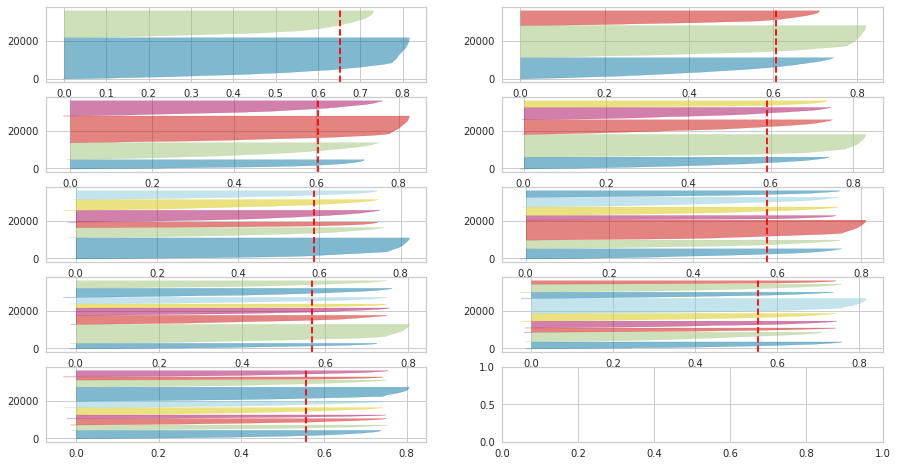

In [ ]:
display_cluster_info(X_scaled)